In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

In [2]:
def ans (tp,tn,fp,fn,ac):
    d = pd.Series(index =['tp','tn','fp','fn','spec','sens','ac'])
    
    spec =tn/(tn+fp)
    sens = tp/(tp+fn)
    d = pd.Series(index =['tp','tn','fp','fn','spec','sens','ac'] , data =[tp,tn,fp,fn,spec,sens,ac *100])
    return d

In [3]:
bank = pd.read_csv('bank-full.csv', sep= ';')

In [4]:
bank_1 = bank.drop('y' , axis =1)
bank_1 = pd.get_dummies(bank_1)
bank_1['y'] = bank['y']

In [5]:
bank_1.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,no
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,no
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no


In [6]:
train, test = train_test_split(bank_1,
                               test_size=0.3,
                               random_state=100)

In [7]:
train_x = train.drop('y', axis=1)
train_y = train['y']

test_x = test.drop('y', axis=1)
test_y = test['y']


### Decision Tree

In [8]:
model = DecisionTreeClassifier(random_state=100, max_depth=9 ,criterion = 'gini')
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=9, random_state=100)

In [9]:
pred_test = model.predict(test_x)
pred_results = pd.DataFrame({
    'actual': test_y,
    'predicted': pred_test
})


from sklearn.metrics import accuracy_score

tn,fp,fn,tp= confusion_matrix(pred_results['actual'],pred_results['predicted']).ravel()
print(classification_report(pred_results['actual'],pred_results['predicted']))
ad = ans(tp,tn,fp,fn,accuracy_score(test_y, pred_test))

)

C:\Users\Mishi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


### RANDOM FOREST

In [10]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(random_state=100,n_estimators=300 ,criterion= 'gini', max_depth = 19)
model_rf.fit(train_x,train_y)
pred=model_rf.predict(test_x)

tnr,fpr,fnr,tpr= confusion_matrix(test_y,pred).ravel()
ar = ans(tpr,tnr,fpr,fnr,accuracy_score(test_y,pred))
print(accuracy_score(test_y,pred))
print(classification_report(test_y, pred))
print(ar)

C:\Users\Mishi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


0.9058537304629902
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     11985
         yes       0.66      0.39      0.49      1579

    accuracy                           0.91     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.91      0.90     13564

tp        618.000000
tn      11669.000000
fp        316.000000
fn        961.000000
spec        0.973634
sens        0.391387
ac         90.585373
dtype: float64


## ADA BOOSTER

In [11]:
model3 = AdaBoostClassifier(random_state =100, n_estimators= 300)
model3.fit(train_x,train_y)
pred=model3.predict(test_x)
ar3 = accuracy_score(test_y,pred)
print(accuracy_score(test_y,pred))
print(classification_report(test_y, pred))

0.9005455617811855
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     11985
         yes       0.61      0.39      0.48      1579

    accuracy                           0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [12]:
tna,fpa,fna,tpa= confusion_matrix(test_y,pred).ravel()

In [13]:
aad = ans(tpa,tna,fpa,fna,accuracy_score(test_y,pred))
print(aad)

tp        618.000000
tn      11597.000000
fp        388.000000
fn        961.000000
spec        0.967626
sens        0.391387
ac         90.054556
dtype: float64


C:\Users\Mishi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [14]:
from sklearn.neighbors import KNeighborsClassifier

### KNN 

In [15]:
model4 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
model4.fit(train_x,train_y)
pred=model4.predict(test_x)
ar4 = accuracy_score(test_y,pred)
print(accuracy_score(test_y,pred))
print(classification_report(test_y, pred))

0.8750368622825125
              precision    recall  f1-score   support

          no       0.91      0.95      0.93     11985
         yes       0.44      0.30      0.36      1579

    accuracy                           0.88     13564
   macro avg       0.68      0.62      0.64     13564
weighted avg       0.86      0.88      0.86     13564



In [16]:
tnn,fpn,fnn,tpn= confusion_matrix(test_y,pred).ravel()
ak = ans(tpn,tnn,fpn,fnn,accuracy_score(test_y,pred))
print(ak)

tp        469.000000
tn      11400.000000
fp        585.000000
fn       1110.000000
spec        0.951189
sens        0.297023
ac         87.503686
dtype: float64


C:\Users\Mishi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [17]:
ank  = pd.DataFrame()
ank['Decision Tree'] = ad
ank['Random forest'] = ar
ank['Ada Boost'] = aad
ank['Knn'] = ak

In [18]:
ank

,Decision Tree,Random forest,Ada Boost,Knn
tp,633.000000,618.000000,618.000000,469.000000
tn,11552.000000,11669.000000,11597.000000,11400.000000
fp,433.000000,316.000000,388.000000,585.000000
fn,946.000000,961.000000,961.000000,1110.000000
spec,0.963872,0.973634,0.967626,0.951189
sens,0.400887,0.391387,0.391387,0.297023
ac,89.833382,90.585373,90.054556,87.503686


### 2.	Using IRIS data set we are going to use techniques used by KNN to predict the species, without using KNN inbuilt model. Follow the steps to get the prediction for the first test sample. (use random_state=100 while splitting data in to train & test)
a.	Take first row in test data and identify Euclidean distance with all rows of training data (Use Euclidean distance function
b.	Create a series with the distance values. Index value of the series should be same as the index value of the training data. Sort the series in the ascending order of distance
c.	Pick first 5 neighbors after sorting. For these neighbors, identify their target values. Take a polling and identify which species is having higher count. Your prediction will be that species with higher count.


In [19]:
import seaborn as sns

In [20]:
ir = sns.load_dataset('iris')

In [21]:
ir.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
data = ir.drop('species' , axis =1)
data = pd.get_dummies(data)
data['species'] = ir['species']

In [23]:
train, test = train_test_split(data,
                               test_size=0.3,
                               random_state=100)

In [24]:
train_x = train.drop('species', axis=1)
train_y = train['species']

test_x = test.drop('species', axis=1)
test_y = test['species']

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model_k = KNeighborsClassifier(n_neighbors = 5)
model_k.fit(train_x , train_y)
pred_class = model_k.predict(test_x)
pred_probs = pd.DataFrame(model_k.predict_proba(test_x), columns = ['Neg','Pos','Zero'])

Accuracy 0.9777777777777777
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



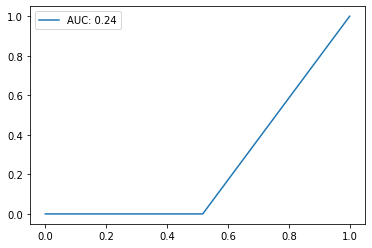

In [26]:
from sklearn.metrics import roc_curve, auc
print('Accuracy' , accuracy_score(test_y, pred_class))
print(classification_report(test_y,pred_class))
fpr_knn , tpr_knn ,threshold = roc_curve(test_y,pred_probs['Pos'], pos_label='setosa')
auc_knn = auc(fpr_knn ,tpr_knn)
plt.plot(fpr_knn , tpr_knn)
plt.legend(['AUC: %.2f' % auc_knn])

In [27]:
test_sample = test_x.iloc[0]
df_eds = pd.DataFrame(columns =['index','euclidean'])
for index, row in train_x.iterrows():
    curr_ed = euclidean(test_sample.values , row.values)
    df_eds = df_eds.append({'index': index,
                           'euclidean':curr_ed} ,ignore_index = True)
neighbors = df_eds.sort_values('euclidean').head()

In [28]:
neighbors = df_eds.sort_values('euclidean' ,ascending= True).head(5)['index']

In [29]:
train_y.loc[neighbors.values]

132.0    virginica
104.0    virginica
103.0    virginica
111.0    virginica
137.0    virginica
Name: species, dtype: object